# My First Data Science Project
## by:  Jeremiah Mojica

## Helicopter Escapes

### Questions to answer:
- In which year did the most helicopter prison break attempts occur?
- In which countries do the most attempted helicopter prison escapes occur?

We begin by importing some helper functions

In [7]:
from helper import *

## Get the data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [8]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

In [9]:
data = data_from_url(url)

Let's print the first three rows

In [10]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Castro to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired the 

## Removing the Details

Removing the 'Details' column so that it is easier to read.

In [15]:
index = 0
for row in data:
    data[index] = row[:-1]
    index += 1
print(data[:3])

[['September 25, 2020', 'Forest prison, Brussels', 'Belgium'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes'], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No']]


## Extracting the year

Turning the Date on each row to just the Year.

In [16]:
for row in data:
    row[0] = fetch_year(row[0])
    
print(data[:3])

[[2020, 'Forest prison, Brussels', 'Belgium'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes'], [1978, 'United States Penitentiary, Marion', 'United States', 'No']]


Getting the minimum and maximum years so that we can use it to get all the years

In [19]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]
print(min_year, max_year)

1973 2020


Getting all the years between `min_year` and `max_year`

In [20]:
years = []
for y in range(min_year, max_year + 1):
    years.append(y)
print(years)

[1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


## Attempts per Year

Getting the attempts per year to answer the our first question: *In which year did the most helicopter prison break attempts occur?*

Initializing the list `attempts_per_year` whose elements look like `[<year>,0]`

In [22]:
attempts_per_year = []
for y in years:
    attempts_per_year.append([y, 0])
print(attempts_per_year)

[[1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


Comparing the years in `attempts_per_year` to the years in `data`. If it matches, increment the second index in the element of `attempts_per_year`. Because it matched, it means that an attempt happened in that year, since it is in `data`.

In [23]:
# Instruction 1 - for each row in data
for row in data:
    for ya in attempts_per_year: # Instruction 2 - nothing to do here
        # Instruction 3 - assign the year value in ya to y
        y = ya[0]
        if row[0] == y:
            ya[1] += 1

# Instruction 4 - print the results
print(attempts_per_year)

[[1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 2]]


### Visualizing the Attempts per Year

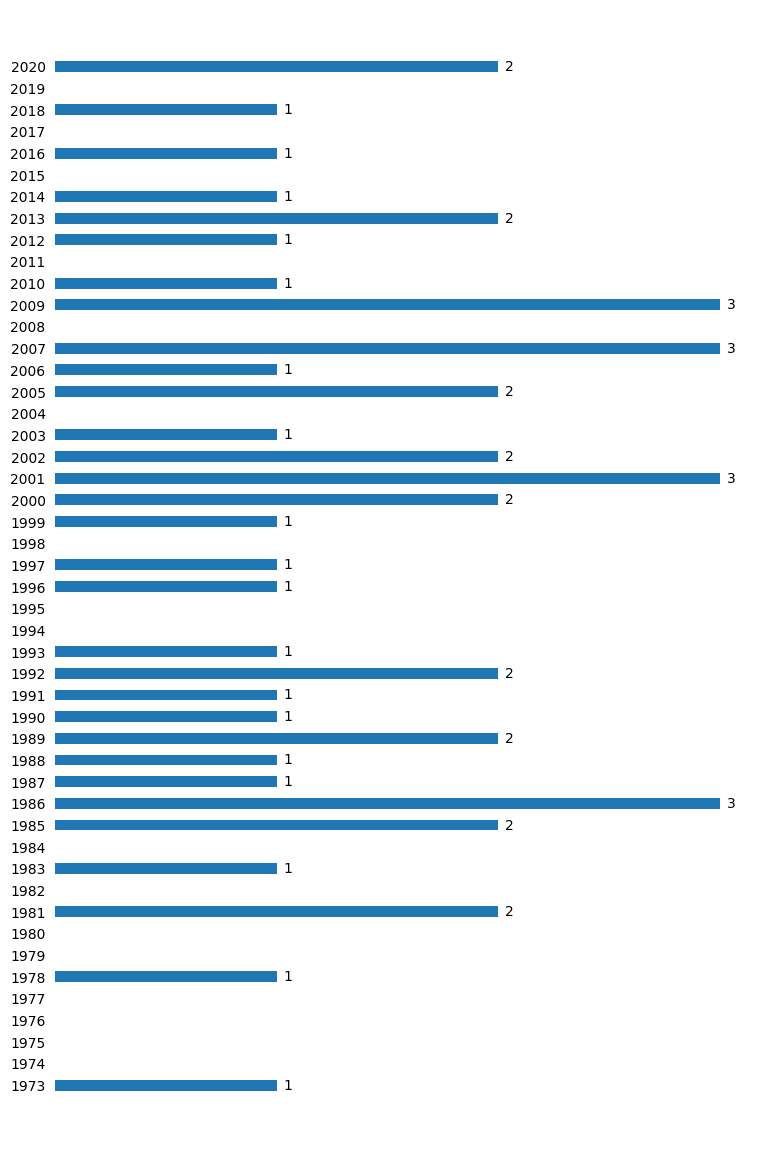

In [24]:
%matplotlib inline
barplot(attempts_per_year)

The years where the most attempts at breaking out of a prison with a helicopter occur are 1986, 2001, 2007, and 2009.

# Attempts by Country

Getting the attempts by country to answer our second question: *In which countries do the most attempted helicopter prison escapes occur?*

In [25]:
countries_frequency = df["Country"].value_counts()
print(countries_frequency)

France            15
United States      8
Belgium            4
Greece             4
Canada             4
United Kingdom     2
Brazil             2
Australia          2
Mexico             1
Russia             1
Ireland            1
Chile              1
Italy              1
Netherlands        1
Puerto Rico        1
Name: Country, dtype: int64


In [27]:
print_pretty_table(countries_frequency)

The country with the most helicopter prison escape attempt is France.